In [1]:
from sklearn.base import BaseEstimator
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
class Perceptron(BaseEstimator):
    """
    params: 
    eta: float learning rate (0.0 : 1.0)
    n_iter: int number of iterations 
    random_state: int random state for intiialization of W
    
    attributes:
    w_: 1d_array weights after fitting
    errors_: list Number of misclassifications
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=0):
        """missing code
        Fill in the members of the init function
        """
        
    def fit(self, X, y):
        """
        Fir training data
        Params:
        X: training data samples array-like shape = [n_samples, n_features]
        y: training data targets array-like shape = [n_samples]
        """
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            print(self.w_)
            for x_i, target in zip (X, y):
                """Missing code 
                   1. Add the code for calculation of the update value to the weights and for the bias
                   2. Add the code for the update of the weights and bias
                   weights delta is: update
                   weights are: self.w_[1:]
                   bias is:  self.w_[0]
                   
                """
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return """ Missing code 
        return the value of the dot product of the weights and the input and add the bias term
        """
    
    def predict(self, X):
        if self.net_input(X) >= 0.0:
            return 1
        else:
            return -1
        
        


In [7]:
def plot_decision_boundaries(X, y, clf, feature_names, target_names, resolution=0.02):
    #clf = ppn
    #resolution=0.02
    plt.figure(figsize=(7.5,5))
    markers = ('s', 'x', 'o', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z=[]
    for smpl in np.c_[xx1.ravel(), xx2.ravel()]:
        Z.append(clf.predict(smpl))
    Z = np.array(Z).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=colors[idx], marker=markers[idx],label=target_names[idx], edgecolor='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[0:100, [0,2]]
y = iris.target[0:100]
y = np.where(y == 0, -1, 1)

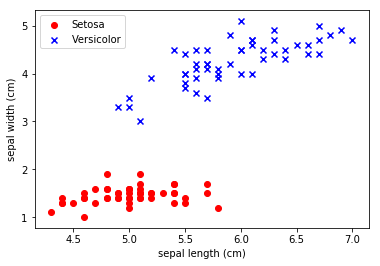

In [3]:
#plot data
plt.figure()
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker ='o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker ='x', label = 'Versicolor')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()


[0.01764052 0.00400157 0.00978738]
[0.01764052 0.04200157 0.07578738]
[0.01764052 0.08000157 0.14178738]
[-0.00235948  0.02000157  0.17978738]
[-0.02235948 -0.08199843  0.15178738]
[-0.02235948 -0.08199843  0.15178738]
[-0.02235948 -0.08199843  0.15178738]
[-0.02235948 -0.08199843  0.15178738]
[-0.02235948 -0.08199843  0.15178738]
[-0.02235948 -0.08199843  0.15178738]


Text(0, 0.5, 'Number of updates')

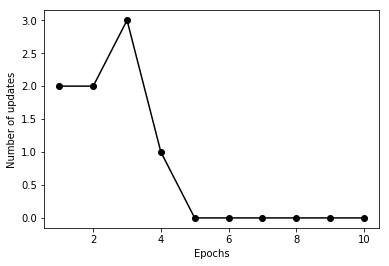

In [4]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, '-ok')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [8]:
ppn.w_

array([-0.02235948, -0.08199843,  0.15178738])

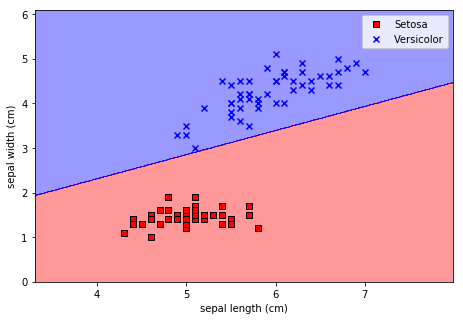

In [9]:
plot_decision_boundaries(X, y, ppn, [iris.feature_names[0],iris.feature_names[1]], ['Setosa','Versicolor' ], resolution=0.01)